Validate the psf using a sample output of DM stack.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import time
import numpy as np
from clusters import data
from clusters.validation import get_filter_list, define_selection_filter, separate_star_gal,compute_elipticities
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [2]:
# Since the output is not the full output, load_cluster function in validation.py won't work. Load the cluster manually.
filename_noExtinction = 'MACSJ2243.3-0935_small.hdf5'
filename_withExtinction = 'MACSJ2243.3-0935_small_extinction.hdf5'
# read in the data
d = data.read_hdf5(filename_noExtinction)
print d.keys()
# read extinction law parameters
d2 = data.read_hdf5(filename_withExtinction)
print d2.keys()

ifilt= 'i_new'      # specify using the new i-band (i_old is a possibility for some outputs)
d2= d2[u'extinction']    # correct_for_extinction wont take the dictionary.

# correct magnitude for extinction
data.correct_for_extinction(d['deepCoadd_forced_src'], d2, ifilt=ifilt)
data.correct_for_extinction(d['deepCoadd_meas'], d2, ifilt=ifilt)

[u'deepCoadd_meas', u'wcs', u'deepCoadd_forced_src']
[u'extinction']


In [3]:
# adapted code from check_star_elipticities to get only the psf ellipticities.
cat='deepCoadd_meas'
oid= 'id'
filters, nfilters = get_filter_list(d[cat])
filt = define_selection_filter(d, cat)
star, gal = separate_star_gal(d, cat, oid, nfilters, filt=filt)
star = star[star['filter'] == 'i']

# Get the psf moments
moments = {'psfs': {'xx': star['ext_shapeHSM_HsmPsfMoments_xx'],
                    'yy': star['ext_shapeHSM_HsmPsfMoments_yy'],
                    'xy': star['ext_shapeHSM_HsmPsfMoments_xy']}}

e1psf, e2psf = compute_elipticities(moments['psfs']['xx'],
                                        moments['psfs']['yy'],
                                        moments['psfs']['xy'])

In [4]:
x_Src= star['x_Src']
y_Src= star['y_Src']

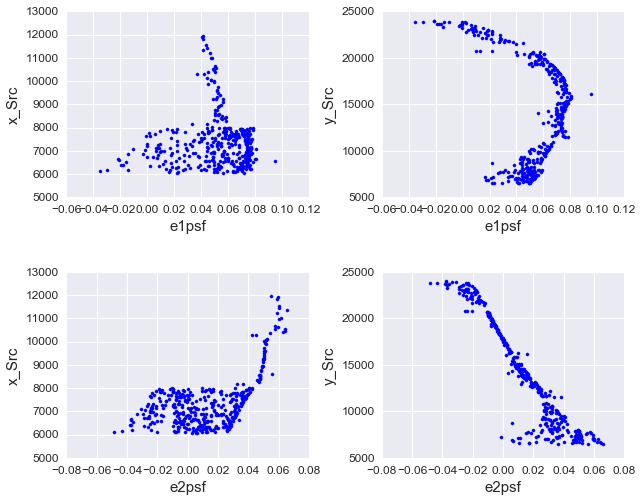

In [5]:
# plot the psf e1, e2, vs x,y
nRow, nCol= 2,2
size, labelsize, ticklabelsize= 10, 15, 12
fig, ax = plt.subplots(nrows=nRow, ncols=nCol)
plt.subplots_adjust(hspace=0.4, wspace= 0.3)

r,c= 0,0
ax[r,c].scatter(e1psf, x_Src, s=size, color='b')
ax[r,c].set_xlabel("e1psf", fontsize=labelsize)
ax[r,c].set_ylabel("x_Src", fontsize=labelsize)
ax[r,c].tick_params(labelsize=ticklabelsize)

r,c= 0,1
ax[r,c].scatter(e1psf, y_Src, s=size, color='b')
ax[r,c].set_xlabel("e1psf", fontsize=labelsize)
ax[r,c].set_ylabel("y_Src", fontsize=labelsize)
ax[r,c].tick_params(labelsize=ticklabelsize)

r,c= 1,0
ax[r,c].scatter(e2psf, x_Src, s=size, color='b')
ax[r,c].set_xlabel("e2psf", fontsize=labelsize)
ax[r,c].set_ylabel("x_Src", fontsize=labelsize)
ax[r,c].tick_params(labelsize=ticklabelsize)

r,c= 1,1
ax[r,c].scatter(e2psf, y_Src, s=size, color='b')
ax[r,c].set_xlabel("e2psf", fontsize=labelsize)
ax[r,c].set_ylabel("y_Src", fontsize=labelsize)
ax[r,c].tick_params(labelsize=ticklabelsize)

fig.set_size_inches(10,8)
plt.show()

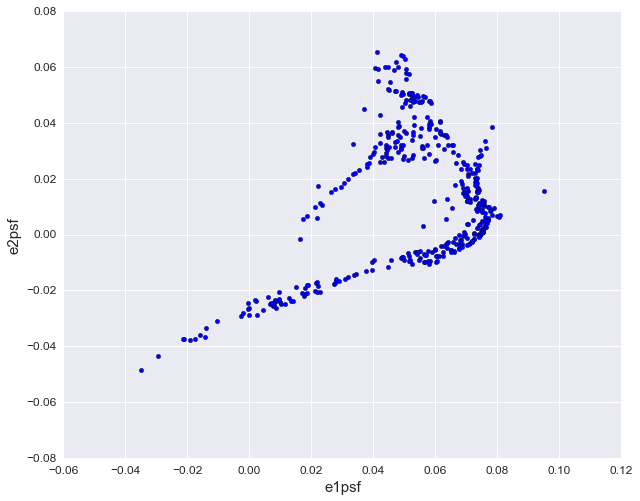

In [6]:
# plot psf e1 vs e2
plt.scatter(e1psf,e2psf)
plt.xlabel("e1psf", fontsize=labelsize)
plt.ylabel("e2psf", fontsize=labelsize)
plt.tick_params(labelsize=ticklabelsize)
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.show()

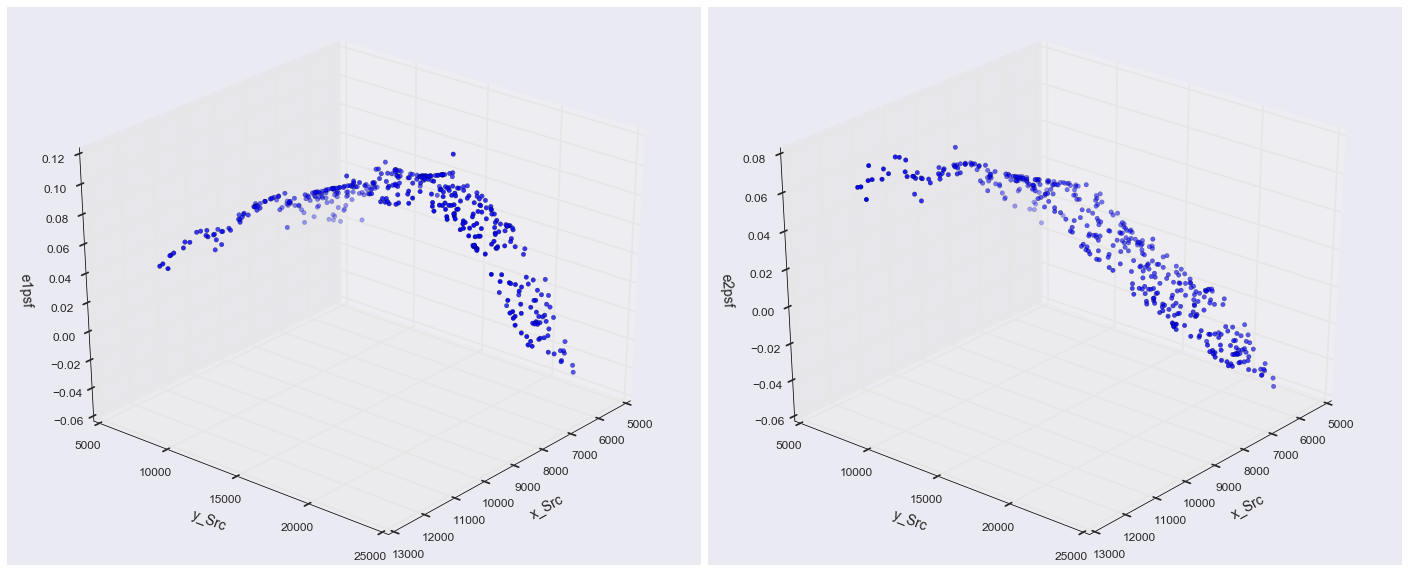

In [7]:
# 3D plots
nRow, nCol= 1,2
size, labelsize, ticklabelsize, labelpad= 12, 14, 12, 15
fig = plt.figure() 
    
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x_Src, y_Src, e1psf, 'b')
ax.set_xlabel('x_Src', fontsize=labelsize)
ax.set_ylabel('y_Src', fontsize=labelsize)
ax.set_zlabel('e1psf', fontsize=labelsize)
ax.xaxis._axinfo['label']['space_factor'] = 30
ax.view_init(elev=30., azim=40)
ax.tick_params(labelsize=ticklabelsize)
ax.xaxis.labelpad=labelpad
ax.yaxis.labelpad=labelpad
ax.zaxis.labelpad=labelpad

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x_Src, y_Src, e2psf, 'b')
ax.set_xlabel('x_Src', fontsize=labelsize)
ax.set_ylabel('y_Src', fontsize=labelsize)
ax.set_zlabel('e2psf', fontsize=labelsize)
ax.view_init(elev=30., azim=40)
ax.tick_params(labelsize=ticklabelsize)
ax.xaxis.labelpad=labelpad
ax.yaxis.labelpad=labelpad
ax.zaxis.labelpad=labelpad

fig.set_size_inches(25,10)
plt.subplots_adjust(wspace= 0.01)
plt.show()